In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/stock-price-data-for-forecasting-problems/stock_price_dada.csv


In [2]:
import pandas as pd


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("../input/stock-price-data-for-forecasting-problems/stock_price_dada.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


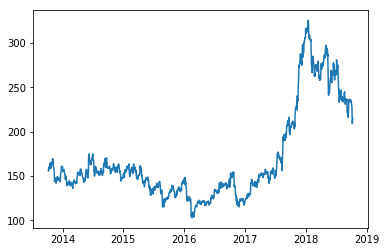

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#setting closing price as target variable and plotting it's data
#setting index of data as DATE
data['Date']=pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index=data['Date']
#plotting data
plt.plot(data['Close'], label='closing price history')

In [5]:
#creating dataframe with date and closing proce as the target variable
data_df=data.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame(index=range(0,len(data)), columns=['Date', 'Close'])

#assign date and the closing price to new_data from data_df
for i in range(0, len(data_df)):
    new_data['Date'][i]=data_df['Date'][i]
    new_data['Close'][i]=data_df['Close'][i]                   

# dividing the given data into training and validation set
train=new_data[:987]
valid=new_data[987:]
new_data.shape, train.shape, valid.shape
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [6]:
#making prediction from the data
predictions=[]
for i in range(0,248):
    a=train['Close'][len(train)-248+i].sum()+sum(predictions)
    b=a/248
    predictions.append(b)

#calculating root mean squre error
rmse=np.sqrt(np.mean(np.power((np.array(valid['Close'])-predictions),2)))
rmse


263.223226352883

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


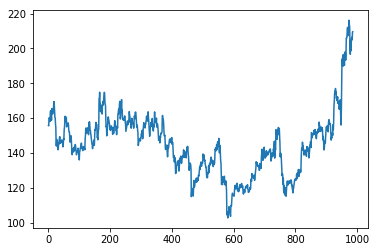

In [7]:
#plotting prediction data
valid['Predictions']=0
valid['Predictions']=predictions
plt.plot(train['Close'])


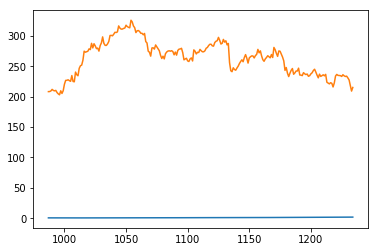

In [8]:
plt.plot(valid['Predictions'])
plt.plot(valid['Close'])

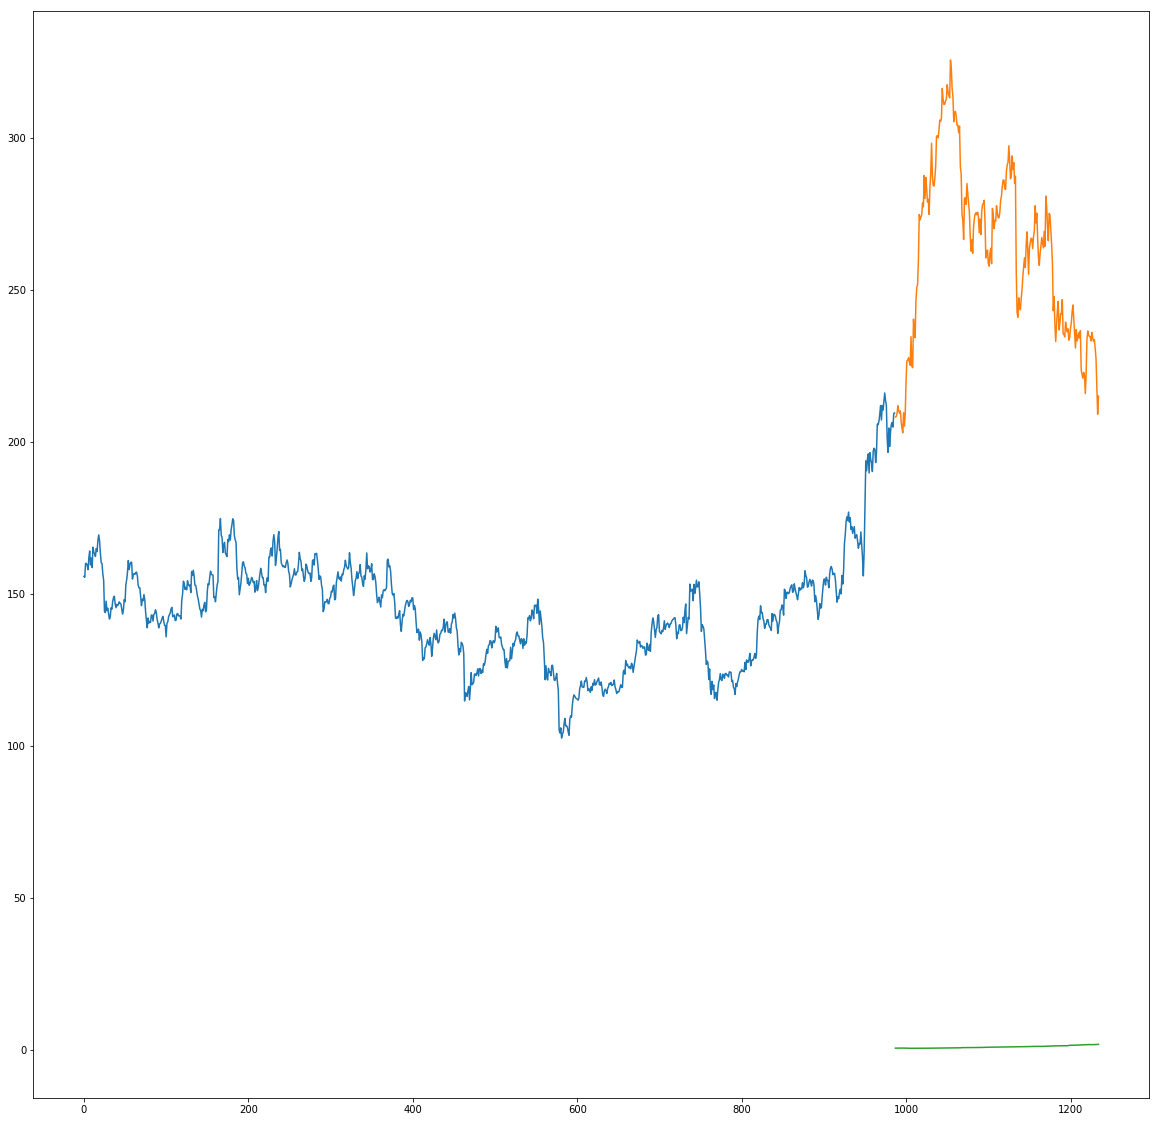

In [9]:
plt.figure(figsize=(20,20))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [10]:
#Applying Linear Regression model
#first step is sorting the data in ascending order AND creating a new dataset so that original dataset is not affected by the new data
#setting index as date value
data['Date']=pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index=data['Date']

# soritng in ascending order
data_sort=data.sort_index(ascending=True, axis=0)

#creating separate datasets
new_data=pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])
for i in range(0, len(data_sort)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]
    
#creating new features
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

#splitting the data into training and vaildation data sets
train=new_data[:987]
valid=new_data[987:]
x_train=train.drop('Close', axis=1)
y_train=train['Close']
x_valid=valid.drop('Close', axis=1)
y_valid=valid['Close']
#implement regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

#predicitons and rmse
predictions=model.predict(x_valid)
rmse=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(predictions)),2)))
rmse

68.26380633017139

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


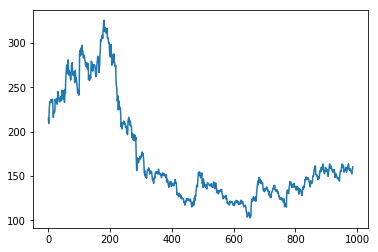

In [11]:
#plotting the data
valid['Predictions']=0
valid['Predictions']=predictions
valid.index=new_data[987:].index
train.index=new_data[:987].index
plt.plot(train['Close'])


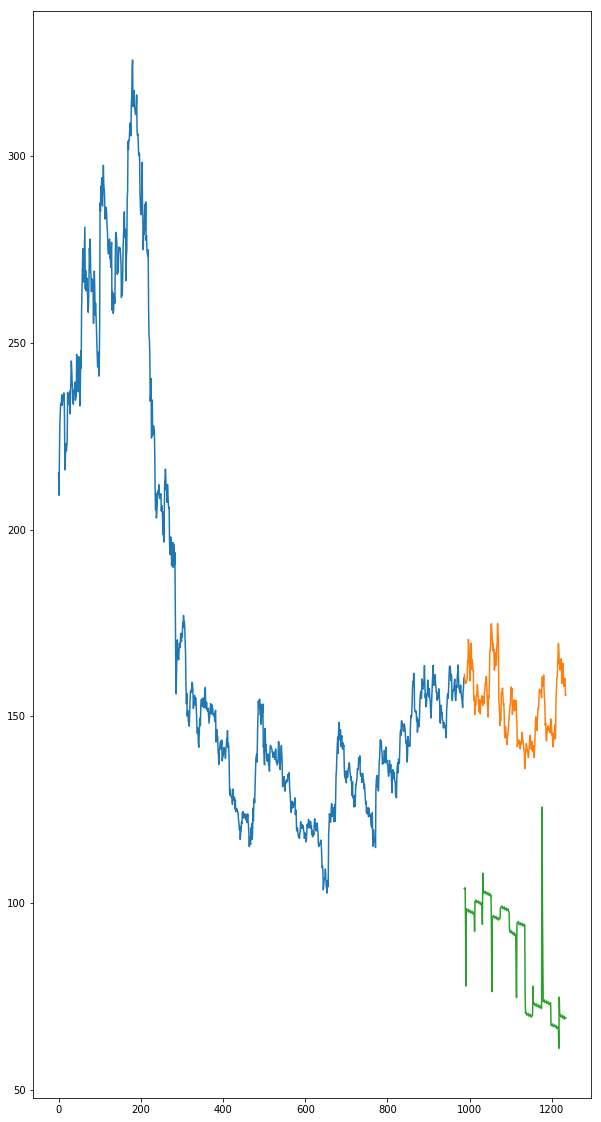

In [12]:
plt.figure(figsize=(10,20))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [13]:
#Implementing the stock market prediciton using K-Nearest Neighbour method
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

#Scaling Data (same training and validation set data from linear regression model)
x_tscaled=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_tscaled)
x_vscaled=scaler.fit_transform(x_valid)
x_valid=pd.DataFrame(x_vscaled)

#Finding best parameters
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
k_nn=neighbors.KNeighborsRegressor()
model=GridSearchCV(k_nn, parameters, cv=None)

#model fitting and prediction making
model.fit(x_train,y_train)
predictions=model.predict(x_valid)

#calculating RMSE
rmse=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(predictions)),2)))
rmse

96.04403016620428

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


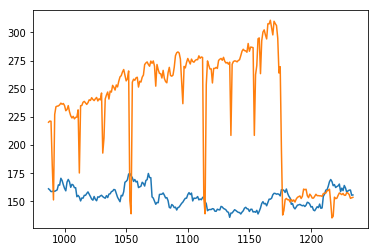

In [14]:
#plotting the data
valid['Predictions']=0
valid['Predictions']=predictions
plt.plot(valid[['Close', 'Predictions']])

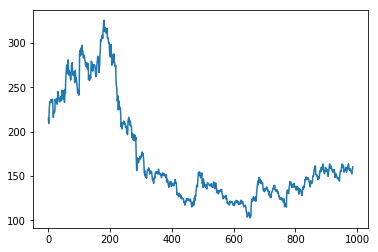

In [15]:
plt.plot(train['Close'])

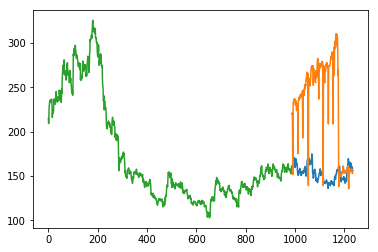

In [16]:
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [17]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 2.9 MB/s 


In [18]:
#TIME SERIES MODELLING
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("../input/stock-price-data-for-forecasting-problems/stock_price_dada.csv")

from pmdarima import auto_arima
d=data.sort_index(ascending=True, axis=0)
train=d[:886]
valid=d[886:]

training=train['Close']
validation=valid['Close']

#Building auto-ARIMA model
model=auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=4921.202, BIC=4945.130, Time=3.261 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=4920.659, BIC=4930.230, Time=0.044 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=4919.200, BIC=4938.342, Time=0.834 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=4919.209, BIC=4938.351, Time=0.813 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=4918.903, BIC=4923.689, Time=0.036 seconds
Fit ARIMA: (0, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=4917.239, BIC=4931.596, Time=0.440 seconds
Fit ARIMA: (0, 1, 0)x(2, 0, 0, 12) (constant=True); AIC=4919.227, BIC=4938.370, Time=1.681 seconds
Fit ARIMA: (0, 1, 0)x(1, 0, 1, 12) (constant=True); AIC=4916.624, BIC=4935.767, Time=1.349 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 1, 12) (constant=True); AIC=4917.247, BIC=4931.604, Time=0.478 seconds
Fit ARIMA: (0, 1, 0)x(2, 0, 1, 12) (constant=True); AIC=4918.014,

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [19]:
#forecasting from the model
forecast=model.predict(n_periods=349)
forecast=pd.DataFrame(forecast, index=valid.index, columns=['Predictions'])

In [20]:
#rmse
rmse=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Predictions'])), 2)))
rmse

17.463797747824998

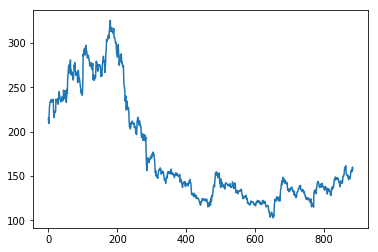

In [21]:
#plotting data
plt.plot(train['Close'])

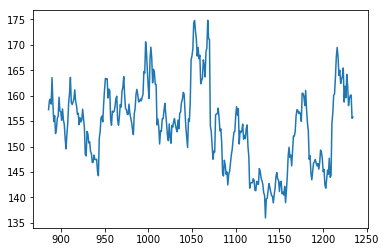

In [22]:
plt.plot(valid['Close'])

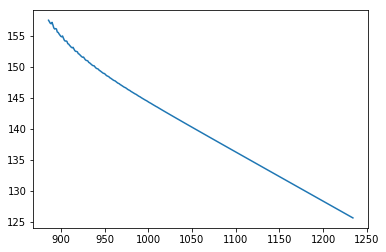

In [23]:
plt.plot(forecast['Predictions'])

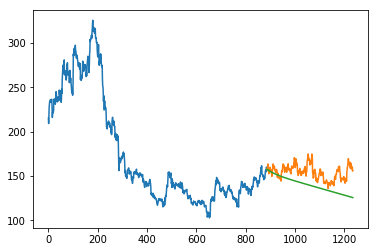

In [24]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Predictions'])

In [25]:
#PROPHET MODELLING
#import prophet
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from fbprophet import Prophet
#creating dataframe
new_data=pd.DataFrame(index=range(0,len(data)), columns=['Date', 'Close'])

In [26]:
#assinging the data to new_data 
for i in range(0, len(d)):
    new_data['Date'][i]=d['Date'][i]
    new_data['Close'][i]=d['Close'][i]
#setting index of new_data as Date
new_data['Date']=pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index=new_data['Date']

#prepare the data
new_data.rename(columns={'Close':'y', 'Date':'ds'}, inplace=True)

#dividing the data into training and validation set and fitting the model
train=new_data[:886]
valid=new_data[886:]

model=Prophet(daily_seasonality=True)
model.fit(train)

In [27]:
#prediciotns
closed_prices=model.make_future_dataframe(periods=len(valid))
forecast=model.predict(closed_prices)

#rmse
forecast_valid=forecast['yhat'][886:]
rmse=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)), 2)))
rmse

46.504698012336746

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



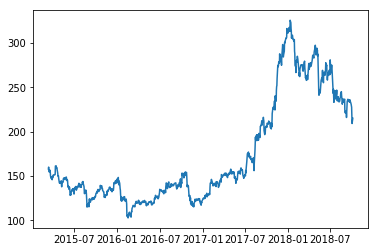

In [28]:
#plotting the data
valid['Predictions']=0
valid['Predictions']=forecast_valid.values
plt.plot(train['y'])

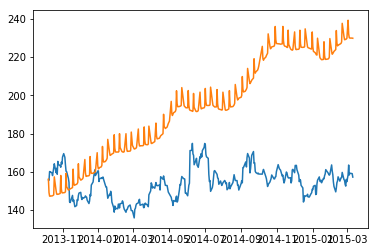

In [29]:
plt.plot(valid[['y', 'Predictions']])

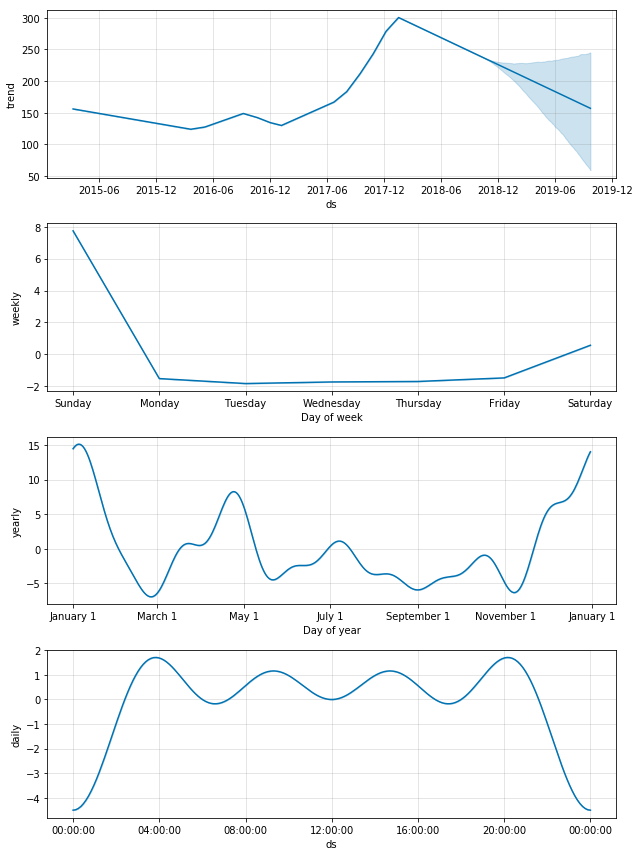

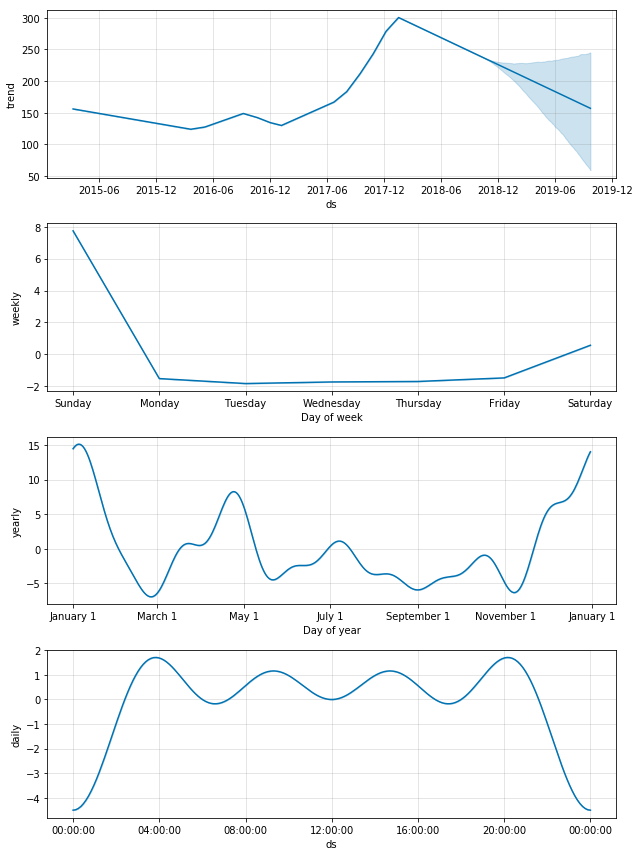

In [30]:
model.plot_components(forecast)

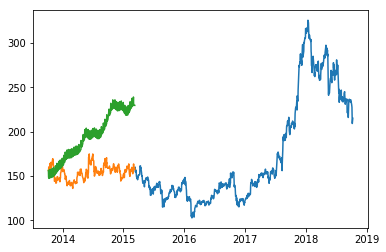

In [31]:
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [32]:
#LSTM MODEL

DESIGNING THE LSTM MODEL FOR THE PREDICTION

In [33]:
#LSTM MODEL
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [34]:
d=data.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])
for i in range(0, len(d)):
    new_data['Date'][i]=d['Date'][i]
    new_data['Close'][i]=d['Close'][i]
    
#setting indexes
new_data.index=new_data.Date
new_data.drop('Date',axis=1, inplace=True)

#training and test sets
dataset=new_data.values
train=dataset[0:886,:]
valid=dataset[886:, :]

#converting to x_train and y_train
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train=[]
y_train=[]

for i in range(50, len(train)):
    x_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#creating LSTM model and fitting it
model=Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 25s - loss: 0.0051


In [35]:
#predict 347 values using past 50 values from train data
inputs=new_data[len(d)-len(valid)-50:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

x_test=[]
for i in range(50, inputs.shape[0]):
    x_test.append(inputs[i-50:i,0])
x_test=np.array(x_test)

x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

closed_price=model.predict(x_test)
closed_price=scaler.inverse_transform(closed_price)

#rmse
rmse=np.sqrt(np.mean(np.power(valid-closed_price, 2)))
rmse

6.990474261993164

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



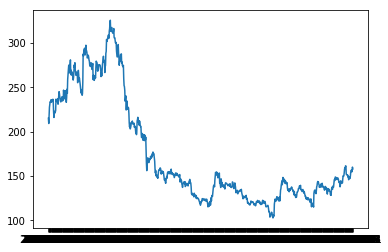

In [36]:
#plotting data
train=new_data[:886]
valid=new_data[886:]
valid['Predictions']=closed_price
plt.plot(train['Close'])

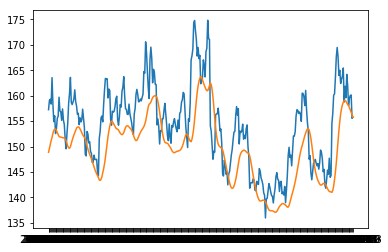

In [37]:
plt.plot(valid[['Close', 'Predictions']])

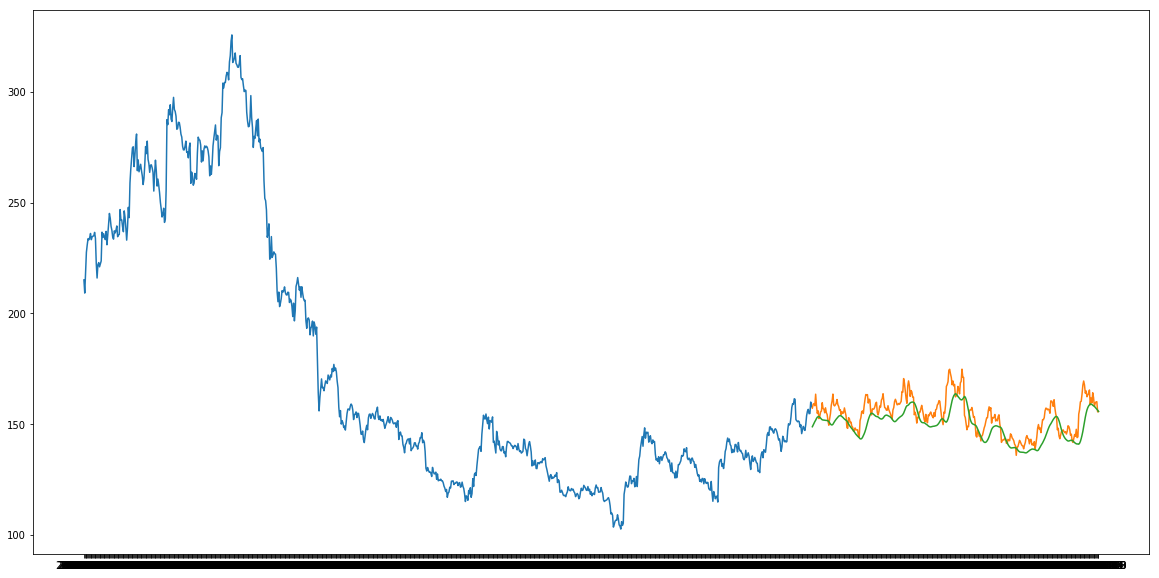

In [38]:
plt.figure(figsize=(20,10))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])